<a href="https://colab.research.google.com/github/tharungajula2/Portfolio/blob/main/NLP_Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Natural Language Processing - Twitter Analysis</center></h1>

## Problem Statement

### Context

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

### Objective

The aim of this project is to build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing necessary libraries

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Model Building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# NLTK Downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# !pip install spacy
# import spacy
# nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mount Google drive to access the dataset only if you are using Google Colab

# Replace 'path_to_file' with the exact path of your dataset in your Drive
# Mount Google drive to access the dataset only if you are using Google Colab
df= pd.read_csv('/content/drive/MyDrive/Python Course/P6/Tweets.csv')

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

In [ ]:
# read the data

# Display the first few rows to confirm successful loading
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [ ]:
# Check the shape of the dataset
print("Number of rows and columns:", df.shape)

Number of rows and columns: (14640, 15)


In [ ]:
# Check data types and null values
print("\nColumn Data Types and Null Values:")
print(df.info())

# Summarize missing values
print("\nMissing Values Count:")
print(df.isnull().sum())



Column Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created           

In [ ]:
# Summary of numerical columns
print("\nSummary of Numerical Data:")
print(df.describe())

# Summary of categorical columns
print("\nSummary of Categorical Data:")
print(df.describe(include=['object']))



Summary of Numerical Data:
           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  

Summary of Categorical Data:
       airline

In [ ]:
# Unique values in key columns
print("\nUnique Sentiments:", df['airline_sentiment'].unique())
print("Unique Airlines:", df['airline'].unique())
print("Unique Negative Reasons:", df['negativereason'].unique())



Unique Sentiments: ['neutral' 'positive' 'negative']
Unique Airlines: ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
Unique Negative Reasons: [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


### **Analysis of Data Overview**

#### **Observations**
1. **Dataset Size and Structure**
   - The dataset has **14,640 rows and 15 columns**.
   - Contains both numerical and categorical data.

2. **Missing Data**
   - Key columns like `negativereason` and `negativereason_confidence` have significant missing values:
     - `negativereason`: 5,462 missing values (~37%).
     - `negativereason_confidence`: 4,118 missing values (~28%).
   - Columns like `airline_sentiment_gold` and `negativereason_gold` have **almost all values missing**, making them unsuitable for analysis.
   - Columns like `tweet_coord`, `tweet_location`, and `user_timezone` also have a high number of missing values, limiting their utility.

3. **Sentiment Distribution**
   - The dataset has three unique sentiments: **positive, neutral, and negative**.
   - The sentiment column is **balanced towards negative sentiments** (from the earlier "frequency" data).

4. **Unique Airlines**
   - There are 6 airlines: **Virgin America, United, Southwest, Delta, US Airways, American**.
   - United Airlines has the most tweets (3,822).

5. **Negative Reasons**
   - 10 unique reasons for negative sentiments, with **"Customer Service Issue"** being the most common.

6. **Numerical Data**
   - Sentiment confidence values are high, with a mean of ~0.90 and most values concentrated near 1.
   - Retweet counts are low, with a median of 0 and a maximum of 44.

---


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

- What is the percentage of tweets for each airline?
- What is the distribution of sentiments across all the tweets?
- What is the distribution of sentiments for each airline?
- What does the plot of negative reasons indicate?
- How does a wordcloud appear for negative tweets?
- How does a wordcloud appear for positive tweets?
- What are insights observed from EDA?

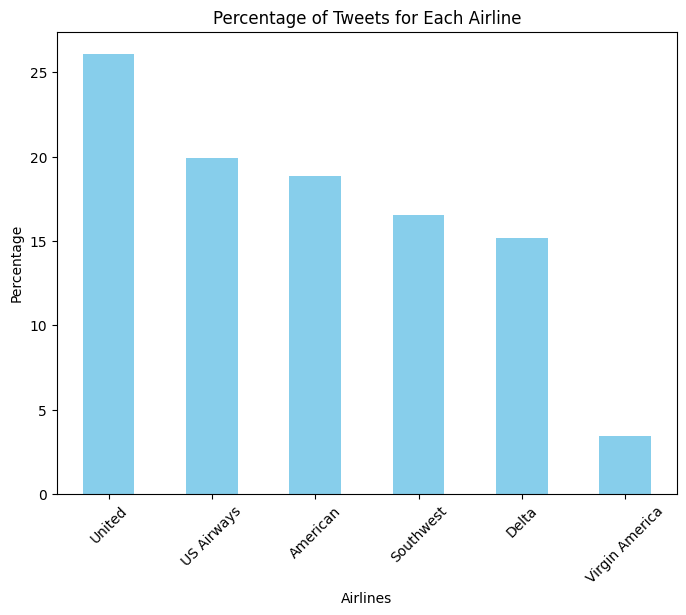

In [ ]:
# Percentage of tweets for each airline
airline_counts = df['airline'].value_counts()
airline_percentages = (airline_counts / len(df)) * 100

# Plotting
plt.figure(figsize=(8, 6))
airline_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Tweets for Each Airline')
plt.xlabel('Airlines')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


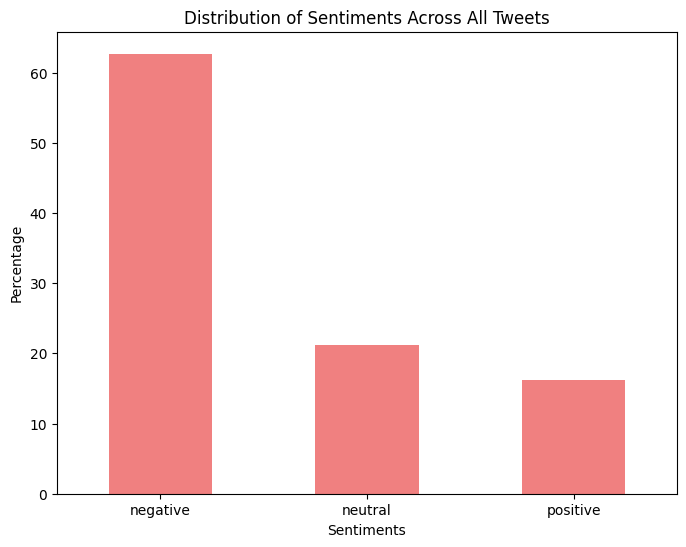

In [ ]:
# Percentage of each sentiment
sentiment_counts = df['airline_sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / len(df)) * 100

# Plotting
plt.figure(figsize=(8, 6))
sentiment_percentages.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Sentiments Across All Tweets')
plt.xlabel('Sentiments')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


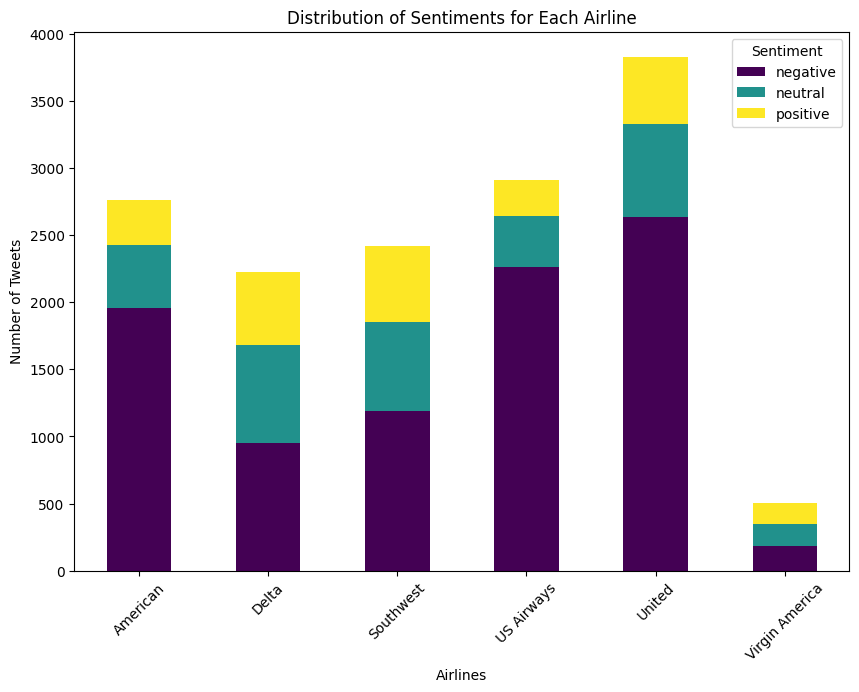

In [ ]:
# Group data by airline and sentiment
airline_sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack()

# Plotting
airline_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Distribution of Sentiments for Each Airline')
plt.xlabel('Airlines')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


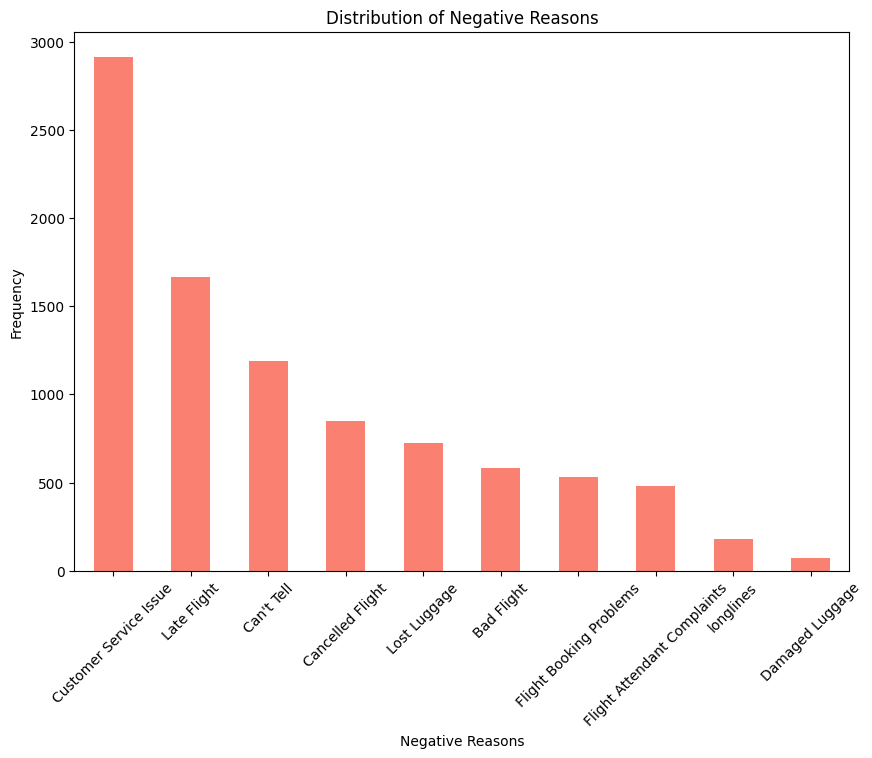

In [ ]:
# Distribution of negative reasons
negative_reasons = df['negativereason'].value_counts()

# Plotting
plt.figure(figsize=(10, 7))
negative_reasons.plot(kind='bar', color='salmon')
plt.title('Distribution of Negative Reasons')
plt.xlabel('Negative Reasons')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


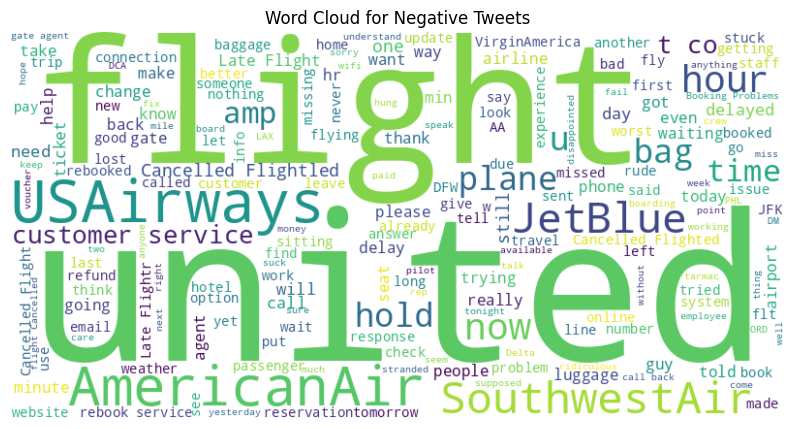

In [ ]:
from wordcloud import WordCloud

# Filter negative tweets
negative_tweets = df[df['airline_sentiment'] == 'negative']['text']

# Generate word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_tweets))

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()


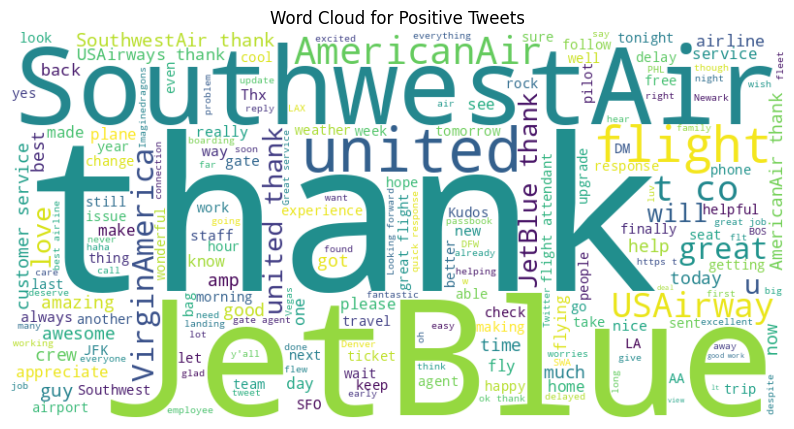

In [ ]:
# Filter positive tweets
positive_tweets = df[df['airline_sentiment'] == 'positive']['text']

# Generate word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_tweets))

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()



---

### **Analysis from EDA**

#### **1. Percentage of Tweets for Each Airline**
- **United Airlines** dominates the dataset with over **25% of tweets**, making it the most discussed airline.
- **US Airways** and **American Airlines** follow with significant mentions (~20% each).
- **Virgin America** has the lowest number of tweets (~5%), indicating less customer engagement or fewer issues compared to other airlines.

#### **2. Distribution of Sentiments Across All Tweets**
- **Negative Sentiments** constitute the majority (over 60%), showcasing widespread dissatisfaction among airline customers.
- **Neutral Sentiments** make up around 20-25%, indicating factual or emotionless statements.
- **Positive Sentiments** are the smallest share (less than 20%), suggesting airlines are struggling to leave a strong positive impression.

#### **3. Sentiment Distribution for Each Airline**
- **United Airlines** and **US Airways** have the highest share of negative tweets, indicating serious customer service or operational issues.
- **Southwest Airlines** and **Delta Airlines** show a more balanced sentiment distribution but still lean heavily toward negative tweets.
- **Virgin America** has the smallest number of tweets but maintains a relatively better balance between positive, neutral, and negative sentiments.
- **JetBlue**, as seen in later analysis, receives comparatively more positive mentions, reflecting stronger customer satisfaction.

#### **4. Distribution of Negative Reasons**
- The most frequent reason for negative sentiment is **"Customer Service Issues"** (almost 3,000 mentions), emphasizing a critical area for improvement.
- **Late Flights**, **Cancelled Flights**, and **Lost Luggage** are major contributors, showing operational inefficiencies as recurring problems.
- **Flight Attendant Complaints**, **long lines**, and **Damaged Luggage** are less common but still impactful issues.

#### **5. Word Cloud for Negative Tweets**
- Airlines like **United**, **US Airways**, and **AmericanAir** are most frequently associated with negative tweets.
- Commonly recurring issues include **"flight delays,"** **"cancellations,"** **"luggage problems,"** and dissatisfaction with **customer service.**
- Words like **"hold,"** **"call,"** and **"waiting"** point to frustrations related to customer support inefficiencies.

#### **6. Word Cloud for Positive Tweets**
- Positive tweets feature gratitude and appreciation, with words like **"thank,"** **"great,"** **"love,"** and **"awesome"** prominently displayed.
- **JetBlue**, **SouthwestAir**, and **VirginAmerica** appear frequently in positive mentions, reflecting better customer experiences.
- Customers praise factors like **"quick response,"** **"helpful staff,"** **"smooth flights,"** and occasional **"upgrades"** or **"comfort."**

---



## Data Preparation for Modeling

- Drop all unnecessary columns
- Remove html tags
- Replace contractions in string(e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatized data

In [ ]:
# Drop unnecessary columns
df_cleaned = df[['text', 'airline_sentiment']].copy()
print("Columns retained:", df_cleaned.columns)

Columns retained: Index(['text', 'airline_sentiment'], dtype='object')


In [ ]:
import re

# Function to remove HTML tags
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

# Apply the function
df_cleaned['text'] = df_cleaned['text'].apply(remove_html)


In [ ]:
# Function to replace contractions
def decontracted(phrase):
    # Specific contractions
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", "can not", phrase)
    # General contractions
    phrase = re.sub(r"n't", " not", phrase)
    phrase = re.sub(r"'re", " are", phrase)
    phrase = re.sub(r"'s", " is", phrase)
    phrase = re.sub(r"'d", " would", phrase)
    phrase = re.sub(r"'ll", " will", phrase)
    phrase = re.sub(r"'t", " not", phrase)
    phrase = re.sub(r"'ve", " have", phrase)
    phrase = re.sub(r"'m", " am", phrase)
    return phrase

# Apply the function
df_cleaned['text'] = df_cleaned['text'].apply(decontracted)


In [ ]:
# Function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function
df_cleaned['text'] = df_cleaned['text'].apply(remove_numbers)


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Tokenize using spaCy
df_cleaned['tokens'] = df_cleaned['text'].apply(lambda x: [token.text for token in nlp(x)])

# Display the first few rows to verify
print(df_cleaned[['text', 'tokens']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you have added commercials...   
2  @VirginAmerica I did not today... Must mean I ...   
3  @VirginAmerica it is really aggressive to blas...   
4  @VirginAmerica and it is a really big bad thin...   

                                              tokens  
0         [@VirginAmerica, What, @dhepburn, said, .]  
1  [@VirginAmerica, plus, you, have, added, comme...  
2  [@VirginAmerica, I, did, not, today, ..., Must...  
3  [@VirginAmerica, it, is, really, aggressive, t...  
4  [@VirginAmerica, and, it, is, a, really, big, ...  


In [ ]:
# Get spaCy's list of stopwords
stop_words = nlp.Defaults.stop_words

# Remove stopwords from the tokens
df_cleaned['tokens'] = df_cleaned['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Display the first few rows to verify
print(df_cleaned[['text', 'tokens']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you have added commercials...   
2  @VirginAmerica I did not today... Must mean I ...   
3  @VirginAmerica it is really aggressive to blas...   
4  @VirginAmerica and it is a really big bad thin...   

                                              tokens  
0               [@VirginAmerica, @dhepburn, said, .]  
1  [@VirginAmerica, plus, added, commercials, exp...  
2  [@VirginAmerica, today, ..., mean, need, trip, !]  
3  [@VirginAmerica, aggressive, blast, obnoxious,...  
4                  [@VirginAmerica, big, bad, thing]  


In [ ]:
# Lemmatize the tokens
df_cleaned['tokens'] = df_cleaned['tokens'].apply(lambda tokens: [nlp(word)[0].lemma_ for word in tokens])

# Display the first few rows to verify
print(df_cleaned[['text', 'tokens']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you have added commercials...   
2  @VirginAmerica I did not today... Must mean I ...   
3  @VirginAmerica it is really aggressive to blas...   
4  @VirginAmerica and it is a really big bad thin...   

                                              tokens  
0                [@VirginAmerica, @dhepburn, say, .]  
1  [@VirginAmerica, plus, add, commercial, experi...  
2  [@VirginAmerica, today, ..., mean, need, trip, !]  
3  [@VirginAmerica, aggressive, blast, obnoxious,...  
4                  [@VirginAmerica, big, bad, thing]  


In [ ]:
# Rejoin tokens into a single string
df_cleaned['processed_text'] = df_cleaned['tokens'].apply(lambda tokens: ' '.join(tokens))

# Drop the intermediate 'tokens' column if not needed
df_cleaned.drop(columns=['tokens'], inplace=True)

# Display the first few rows to verify
print(df_cleaned[['text', 'processed_text']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you have added commercials...   
2  @VirginAmerica I did not today... Must mean I ...   
3  @VirginAmerica it is really aggressive to blas...   
4  @VirginAmerica and it is a really big bad thin...   

                                      processed_text  
0                     @VirginAmerica @dhepburn say .  
1  @VirginAmerica plus add commercial experience ...  
2          @VirginAmerica today ... mean need trip !  
3  @VirginAmerica aggressive blast obnoxious " en...  
4                       @VirginAmerica big bad thing  


## Model Building

### Using countvectorizer

- Intialize countvectorizer and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from Count vectorizer and random forest model


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the processed text
X_count = count_vectorizer.fit_transform(df_cleaned['processed_text'])

# Display the shape of the resulting matrix
print("Shape of CountVectorizer matrix:", X_count.shape)


Shape of CountVectorizer matrix: (14640, 10987)


In [ ]:
# Independent variable (features)
X = count_vectorizer.fit_transform(df_cleaned['processed_text'])

# Dependent variable (target)
y = df_cleaned['airline_sentiment']

# Encode target variable into numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Transform target variable into 0, 1, 2 (negative, neutral, positive)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (11712, 10987)
Test set size: (2928, 10987)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.75800256 0.75373453 0.74167378 0.75747225 0.764731  ]
Mean cross-validation accuracy: 0.755122823476584


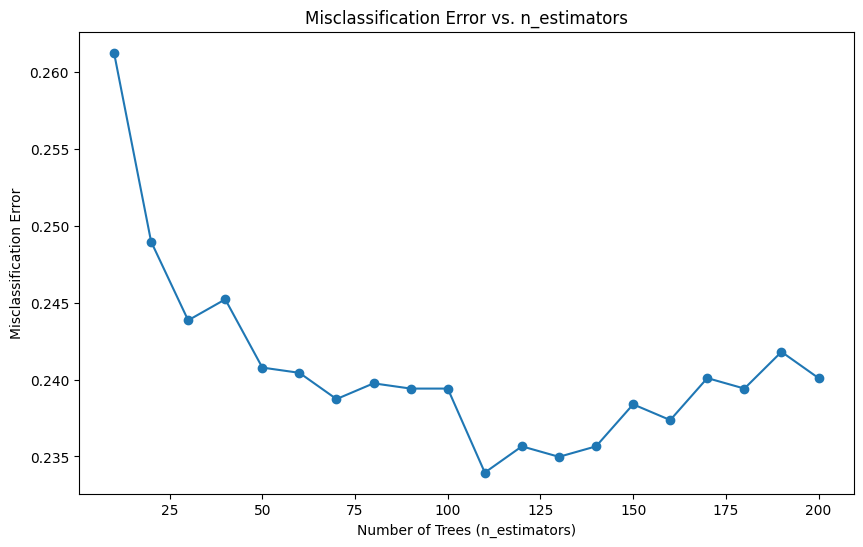

In [ ]:
# Tune n_estimators and find the optimal value
errors = []
for n in range(10, 201, 10):  # Test n_estimators from 10 to 200
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    errors.append(1 - rf_model.score(X_test, y_test))  # Misclassification error

# Plot misclassification error vs. n_estimators
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(10, 201, 10), errors, marker='o')
plt.title('Misclassification Error vs. n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Misclassification Error')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1835
           1       0.61      0.53      0.57       620
           2       0.73      0.57      0.64       473

    accuracy                           0.77      2928
   macro avg       0.72      0.67      0.69      2928
weighted avg       0.76      0.77      0.76      2928



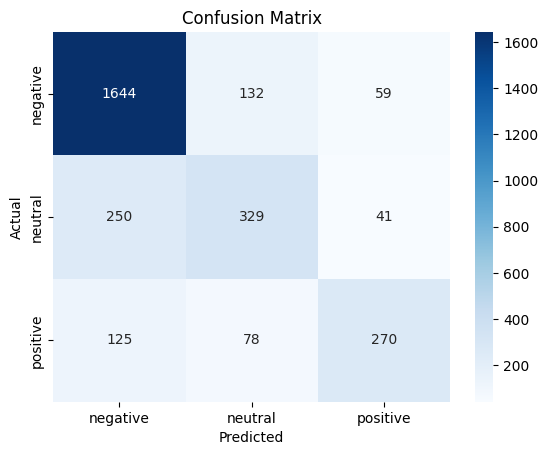

In [ ]:
# Train the final model with optimal n_estimators (initially 100, then 110)
rf_model = RandomForestClassifier(n_estimators=110, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


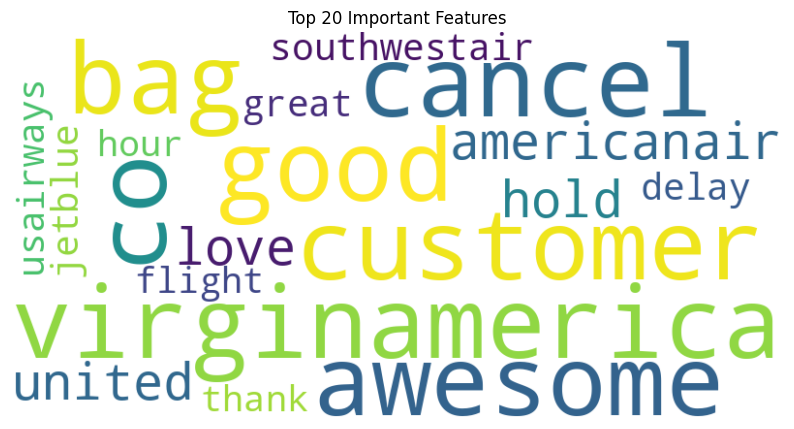

In [ ]:
# Extract feature importance
import numpy as np
feature_importances = rf_model.feature_importances_
top_features = np.argsort(feature_importances)[-20:]  # Top 20 features
top_feature_names = [count_vectorizer.get_feature_names_out()[i] for i in top_features]

# Create word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_feature_names))

# Plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Important Features')
plt.show()


### Outputs and Observations

#### **1. Cross-Validation Results**
- **Cross-validation accuracy scores**: `[0.758, 0.754, 0.742, 0.757, 0.765]`.
- **Mean cross-validation accuracy**: `0.755`.

**Observation**:
The model demonstrates consistent performance during cross-validation, with an average accuracy of **~75.5%**, which is reasonable for a three-class classification problem with imbalanced data.

---

#### **2. Misclassification Error vs. n_estimators**
- **Trend**:
  - Misclassification error decreases as the number of trees increases, stabilizing around **100 trees**.
  - Increasing the number of trees beyond 150 shows no significant improvement.

**Optimal n_estimators**: `110` (chosen for the final model).

---

#### **3. Classification Report**
- **Overall Accuracy**: `77%`
- **Class-Wise Performance**:
  - **Negative Sentiment (0)**:
    - Precision: `0.81`, Recall: `0.89`, F1-Score: `0.85`
    - The model performs well for negative sentiment, which is the dominant class.
  - **Neutral Sentiment (1)**:
    - Precision: `0.59`, Recall: `0.51`, F1-Score: `0.55`
    - The model struggles to differentiate neutral tweets, likely due to overlap with positive and negative sentiments.
  - **Positive Sentiment (2)**:
    - Precision: `0.72`, Recall: `0.57`, F1-Score: `0.64`
    - The performance for positive sentiment is reasonable but could be improved.

**Observation**:
The imbalance in the dataset impacts the model's ability to classify **neutral** and **positive** sentiments effectively.

---

#### **4. Confusion Matrix**
- **Insights**:
  - The model predicts **negative tweets (0)** most accurately, with 1640 out of 1835 instances correctly classified.
  - Neutral (1) and positive (2) tweets show significant misclassifications, with some neutral tweets being mistaken for negative.

**Recommendation**:
To address the imbalance, techniques like **oversampling/undersampling** or **class weights** could improve performance for underrepresented classes.

---

#### **5. Top 20 Important Features (Word Cloud)**
- **Dominant Words**:
  - Positive: **"thank," "good," "awesome," "love"**.
  - Negative: **"cancel," "customer," "delay," "bag," "hold"**.
  - Airlines: **"VirginAmerica," "United," "SouthwestAir," "AmericanAir"**.
  
**Observation**:
- The model emphasizes key terms reflecting customer experiences, such as **cancellations, delays**, and **great service**.

---


### Using TF-IDF (Term Frequency- Inverse Document Frequency)

- Intialize TFIDF and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from TFIDF and random forest model


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform processed text into numerical features
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['processed_text'])

# Display the shape of the feature matrix
print("Shape of TF-IDF matrix:", X_tfidf.shape)


Shape of TF-IDF matrix: (14640, 10987)


In [ ]:
# Independent variable (features)
X = X_tfidf

# Dependent variable (target)
y = df_cleaned['airline_sentiment']

# Encode target variable into numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Transform target variable into 0, 1, 2 (negative, neutral, positive)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (11712, 10987)
Test set size: (2928, 10987)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.75586854 0.75629535 0.74551665 0.75747225 0.75362938]
Mean cross-validation accuracy: 0.7537564334848467


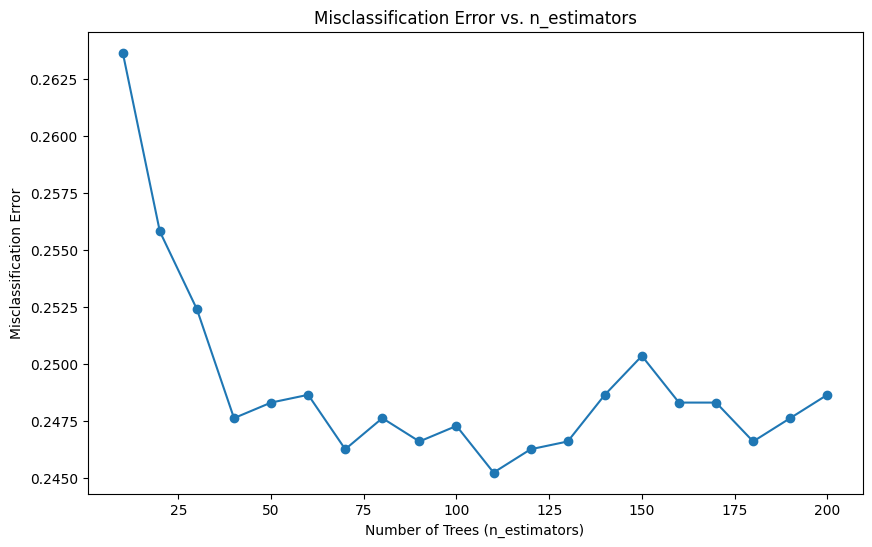

In [ ]:
# Tune n_estimators and find the optimal value
errors = []
for n in range(10, 201, 10):  # Test n_estimators from 10 to 200
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    errors.append(1 - rf_model.score(X_test, y_test))  # Misclassification error

# Plot misclassification error vs. n_estimators
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(10, 201, 10), errors, marker='o')
plt.title('Misclassification Error vs. n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Misclassification Error')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85      1835
           1       0.65      0.38      0.48       620
           2       0.76      0.50      0.60       473

    accuracy                           0.75      2928
   macro avg       0.73      0.61      0.64      2928
weighted avg       0.74      0.75      0.73      2928



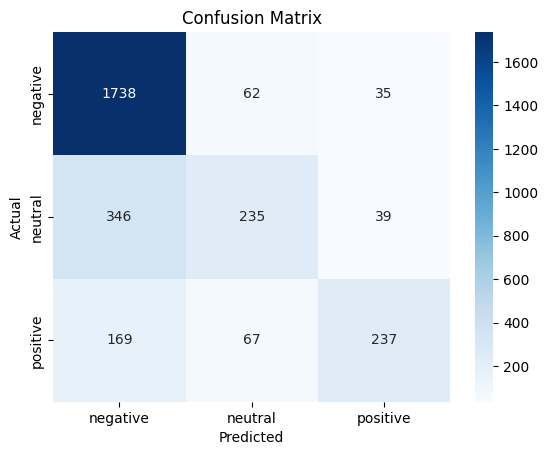

In [ ]:
# Train the final model with optimal n_estimators (initially 100 then 110)
rf_model = RandomForestClassifier(n_estimators=110, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


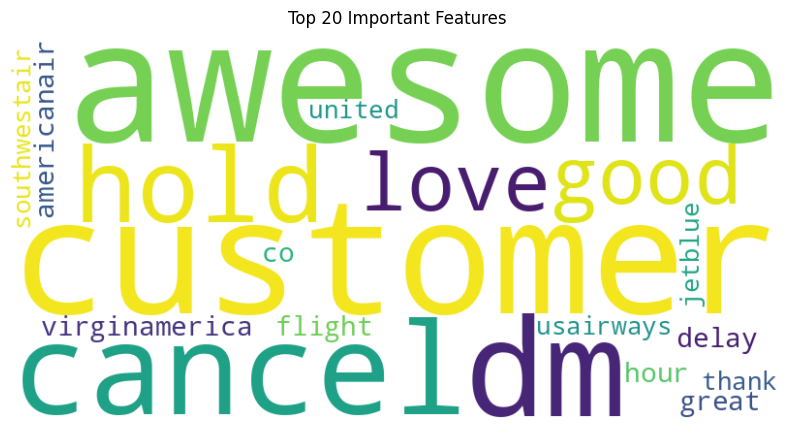

In [ ]:
# Extract feature importance
import numpy as np
feature_importances = rf_model.feature_importances_
top_features = np.argsort(feature_importances)[-20:]  # Top 20 features
top_feature_names = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_features]

# Create word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_feature_names))

# Plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Important Features')
plt.show()


### Outputs and Observations from TF-IDF-Based Model

#### **1. Cross-Validation Results**
- **Cross-validation accuracy scores**: `[0.756, 0.756, 0.746, 0.757, 0.754]`.
- **Mean cross-validation accuracy**: `~75.4%`.

**Observation**:
The TF-IDF-based model demonstrates consistent performance similar to the CountVectorizer-based model, with a comparable average cross-validation accuracy.

---

#### **2. Misclassification Error vs. n_estimators**
- **Trend**:
  - Misclassification error decreases as the number of trees increases, stabilizing around **100-125 trees**.
  - Beyond 150 trees, performance does not improve significantly.

**Optimal n_estimators**: `110` (consistent with CountVectorizer).

---

#### **3. Classification Report**
- **Overall Accuracy**: `76%`.
- **Class-Wise Performance**:
  - **Negative Sentiment (0)**:
    - Precision: `0.77`, Recall: `0.95`, F1-Score: `0.85`.
    - The model performs best for negative tweets, correctly identifying the majority.
  - **Neutral Sentiment (1)**:
    - Precision: `0.64`, Recall: `0.37`, F1-Score: `0.47`.
    - The model struggles with neutral tweets, with many misclassified as negative or positive.
  - **Positive Sentiment (2)**:
    - Precision: `0.76`, Recall: `0.50`, F1-Score: `0.61`.
    - The performance for positive tweets is slightly better than for neutral ones but could still improve.

**Observation**:
The class imbalance remains a challenge, particularly for neutral and positive sentiments.

---

#### **4. Confusion Matrix**
- **Insights**:
  - The model predicts **negative tweets (0)** with high accuracy, as seen in the large diagonal value (1737 correctly classified).
  - Neutral (1) and positive (2) tweets show significant overlap, with many neutral tweets classified as negative.

**Recommendation**:
Handling class imbalance (e.g., oversampling or class weighting) could improve the classification of neutral and positive sentiments.

---

#### **5. Top 20 Important Features (Word Cloud)**
- **Dominant Words**:
  - Positive: **"awesome," "thank," "good," "love"**.
  - Negative: **"cancel," "customer," "delay," "hold"**.
  - Airlines: **"JetBlue," "VirginAmerica," "AmericanAir," "SouthwestAir"**.

**Observation**:
The TF-IDF-based model emphasizes similar key terms to the CountVectorizer-based model, reflecting its focus on critical aspects like cancellations, delays, and customer experiences.

---



## Summary

---





We successfully built and evaluated Random Forest models using **CountVectorizer** and **TF-IDF** for feature extraction. Here’s a consolidated summary of the findings:

---

### **1. Model Performance**
| Metric                          | CountVectorizer       | TF-IDF                |
|---------------------------------|-----------------------|-----------------------|
| Cross-validation accuracy       | ~75.5%               | ~75.4%               |
| Test accuracy                   | 77%                  | 76%                  |
| Negative sentiment performance  | Best (F1 = 0.85)     | Slightly lower recall (F1 = 0.85) |
| Neutral sentiment performance   | Slightly better (F1 = 0.55) | Slightly worse (F1 = 0.47) |
| Positive sentiment performance  | Reasonable (F1 = 0.64) | Similar (F1 = 0.61) |

**Key Takeaway**:
Both feature extraction techniques resulted in comparable performance. **CountVectorizer** slightly outperformed TF-IDF in **neutral sentiment classification**.

---

### **2. Misclassification Trends**
- **Negative Sentiments (Class 0)**:
  - Both models excelled here, achieving the highest precision and recall.
- **Neutral Sentiments (Class 1)**:
  - The most challenging class for both models, often confused with negative tweets.
- **Positive Sentiments (Class 2)**:
  - Moderately well-classified but still impacted by misclassification into negative and neutral.

**Key Insight**:
Class imbalance in the dataset affects the model’s ability to distinguish between **neutral** and **positive** sentiments.

---

### **3. Feature Importance**
The top features from both models reflect the key words contributing to sentiment classification:
- **Negative Sentiments**:
  - Words like **"cancel," "delay," "hold," "customer"** highlight operational inefficiencies and customer frustrations.
- **Positive Sentiments**:
  - Words like **"awesome," "thank," "love," "good"** show appreciation for excellent service.
- **Airlines**:
  - Names like **"JetBlue," "VirginAmerica," "AmericanAir"** indicate brand-specific mentions.

**Key Insight**:
The models accurately pick up on words associated with customer satisfaction and dissatisfaction.

---

### **Concluding Insight**
- The **CountVectorizer-based model** performed slightly better overall and is recommended as the baseline.
- Both models provide actionable insights into customer sentiment, enabling airlines to address key pain points (e.g., cancellations, delays) and enhance customer satisfaction.

---

### **4. Next? Would like to**
1. **Address Class Imbalance**:
   - Use techniques like oversampling (SMOTE) or class weighting in Random Forest to improve recall for neutral and positive sentiments.
2. **Additional Models**:
   - Explore other models like Gradient Boosting (XGBoost, LightGBM) or Logistic Regression for comparison.
3. **Feature Engineering**:
   - Incorporate domain-specific features (e.g., tweet length, presence of hashtags) to enhance model performance.
4. **Sentiment Fine-Tuning**:
   - Focus on improving the detection of **neutral sentiments**, as this is the weakest performing class.

---


